<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Первый-регион" data-toc-modified-id="Первый-регион-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Первый регион</a></span></li><li><span><a href="#Второй-регион" data-toc-modified-id="Второй-регион-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Второй регион</a></span></li><li><span><a href="#Третий-регион" data-toc-modified-id="Третий-регион-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Третий регион</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Первый-регион" data-toc-modified-id="Первый-регион-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Первый регион</a></span></li><li><span><a href="#Второй-регион" data-toc-modified-id="Второй-регион-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Второй регион</a></span></li><li><span><a href="#Третий-регион" data-toc-modified-id="Третий-регион-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Третий регион</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Целью** данной работы является решение задачи регрессии с целью выбора региона для разработки скважины . Для этого необходимо выполнить следующие шаги:

1. Провести исследовательский анализ данных и их предподготовку;
2. Разбить данные на выборки и провести обучение с помощью модели линейной регрессии по каждому региону;
3. Провести предварительную оценку экономеческого потенциала регионов, подготовить функцию для расчёта рисков;
4. Рассчитать необходимые экономические метрики и окончательно выбрать регион для разработки скважины.

## Загрузка и подготовка данных

Импорт необходимых библиотек:

In [1]:
# Модели и метрики
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# математические операции
import numpy as np
from numpy.random import RandomState

# работа с таблицами
import pandas as pd

# визуализация данных
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
warnings.filterwarnings('ignore') # игнорируем предупреждения
plt.rc('font', size=18) # устанавливаем размер шрифта на графиках

Ключевые значения, необходимые для расчёта экономических характеристик:

1. *budget* - общий бюджет на разработку скважин, руб;
2. *fields_total* - число скважин, на которые выделяется бюджет;
3. *barrel_1000* - цена за тысячу баррелей, руб;
4. *crit_probability* - пороговое вероятность убытков.

In [3]:
BUDGET = 10_000_000_000
FIELDS_TOTAL = 200
BARREL_1000 = 450_000
CRIT_PROBABILITY = .025

Выгружаем данные в датафреймы:

In [4]:
region_1_data = pd.read_csv('/datasets/geo_data_0.csv')
region_2_data = pd.read_csv('/datasets/geo_data_1.csv')
region_3_data = pd.read_csv('/datasets/geo_data_2.csv')

### Первый регион

Выводим первые пару строк для быстрого осмотра данных:

In [5]:
region_1_data.head(2)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.22117,105.280062
1,2acmU,1.334711,-0.340164,4.36508,73.037750


Выводим информацию о содержании таблицы:

In [6]:
region_1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Метрики по численным данным:

In [7]:
region_1_data.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


Для более наглядного изучения изучим данные с помощью *boxplot'а*:

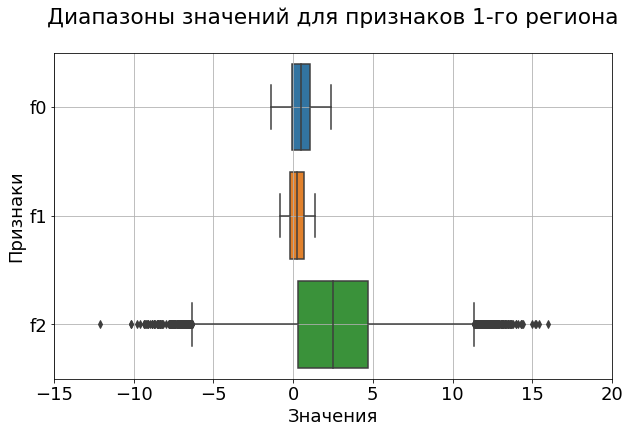

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=region_1_data.iloc[:, :-1], orient='h')
plt.title('Диапазоны значений для признаков 1-го региона\n')
plt.xlabel('Значения')
plt.ylabel('Признаки')
plt.xlim(-15, 20)
plt.grid()
plt.show()

Также визуализируем корреляционную матрицу, чтобы понять, как данные могут зависеть друг от друга:

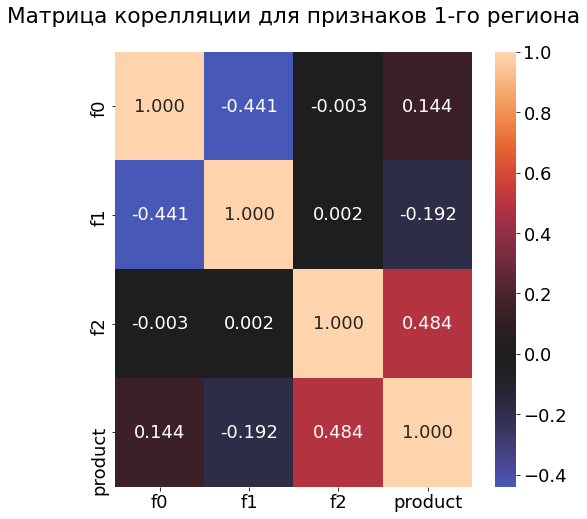

In [9]:
plt.figure(figsize=(8, 8))
sns.heatmap(region_1_data.corr(), annot=True, fmt='.3f', center=0)
plt.title('Матрица корелляции для признаков 1-го региона\n')
plt.show()

В завершение выведем также scatter_matrix:

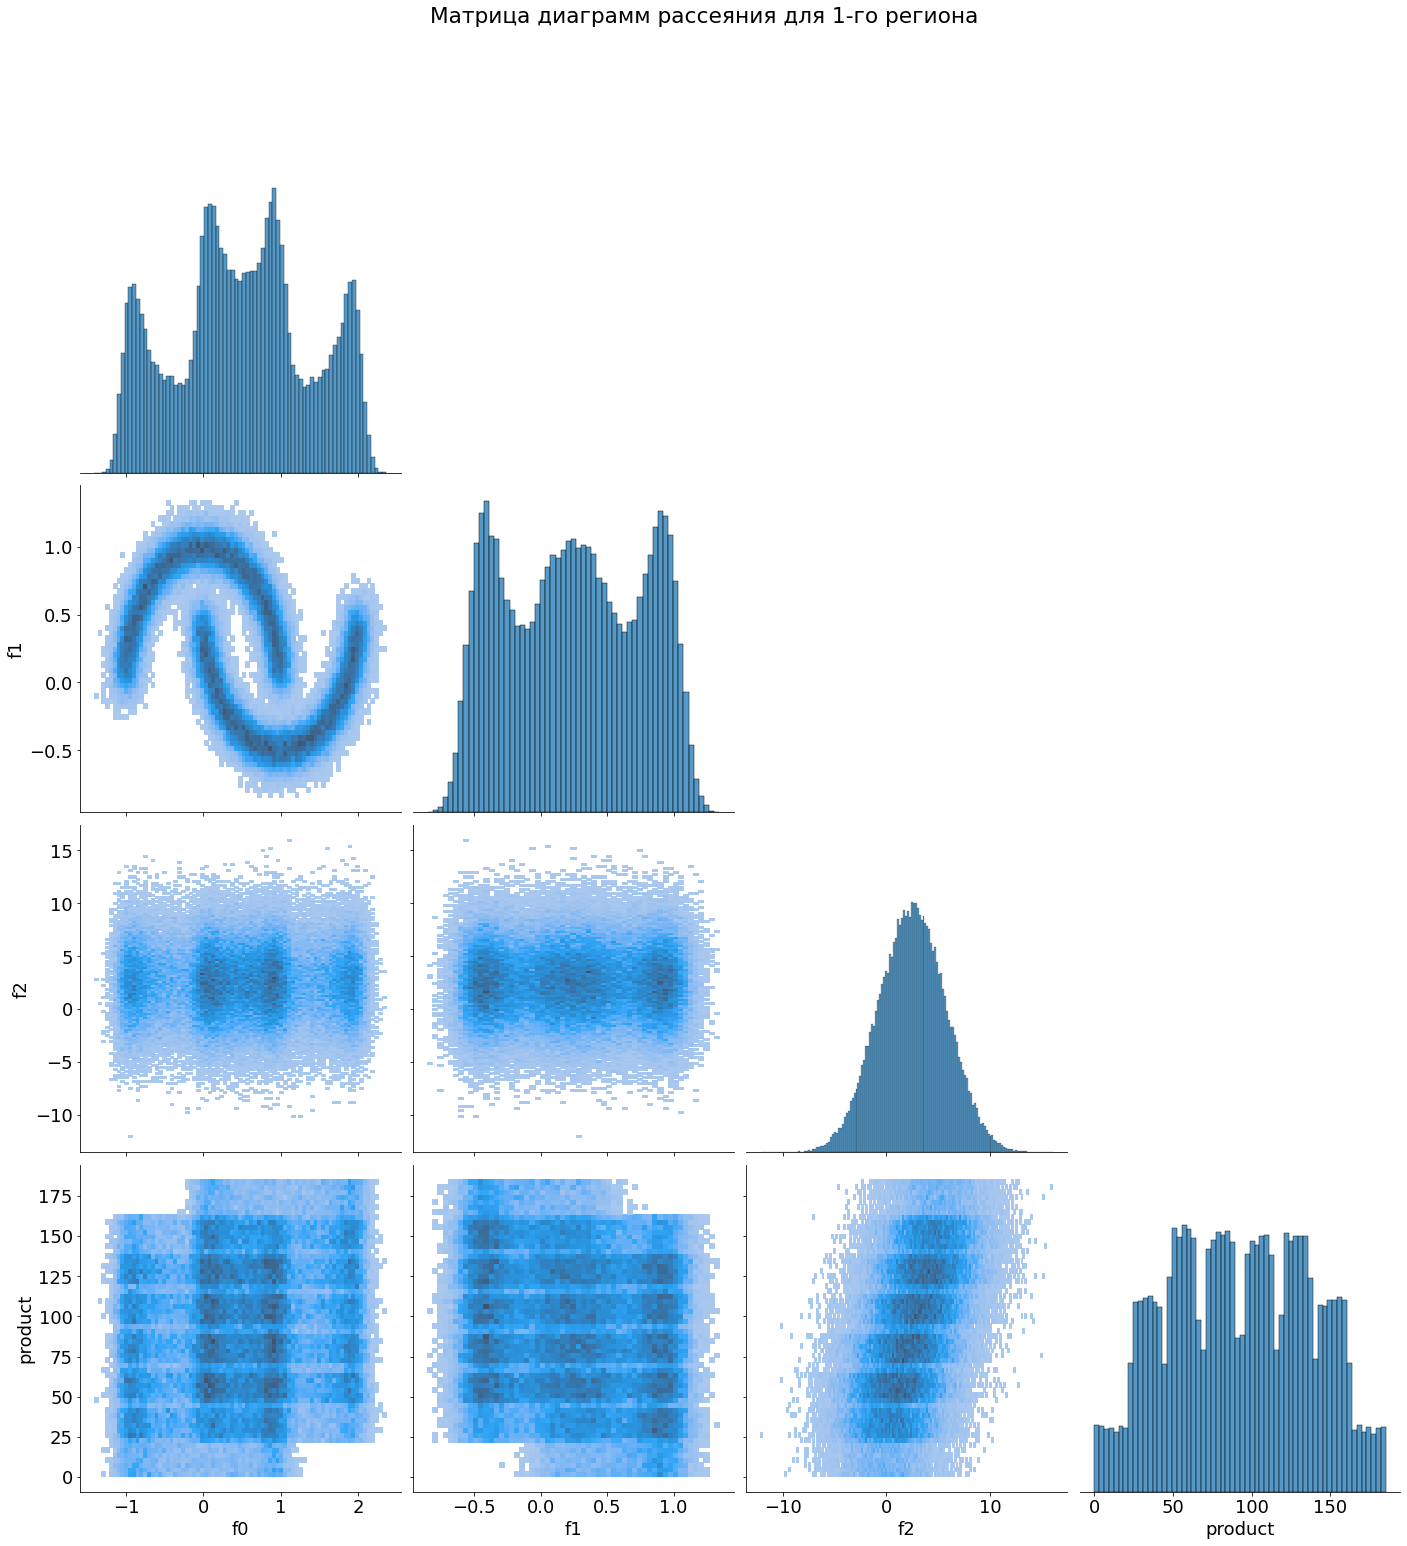

In [10]:
g = sns.pairplot(region_1_data, corner=True, kind='hist', height=5)
g.fig.suptitle('Матрица диаграмм рассеяния для 1-го региона', y=1.08)
plt.show()

Проделаем аналогичные действия для остальных регионов

### Второй регион

In [11]:
region_2_data.head(2)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261


In [12]:
region_2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
region_2_data.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


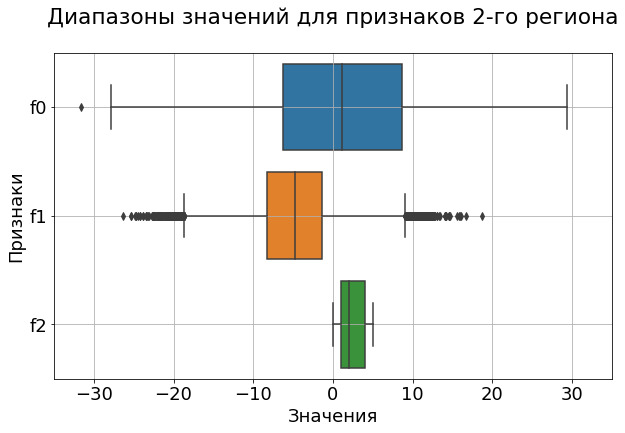

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=region_2_data.iloc[:, :-1], orient='h')
plt.grid()
plt.xlim(-35, 35)
plt.title('Диапазоны значений для признаков 2-го региона\n')
plt.xlabel('Значения')
plt.ylabel('Признаки')
plt.show()

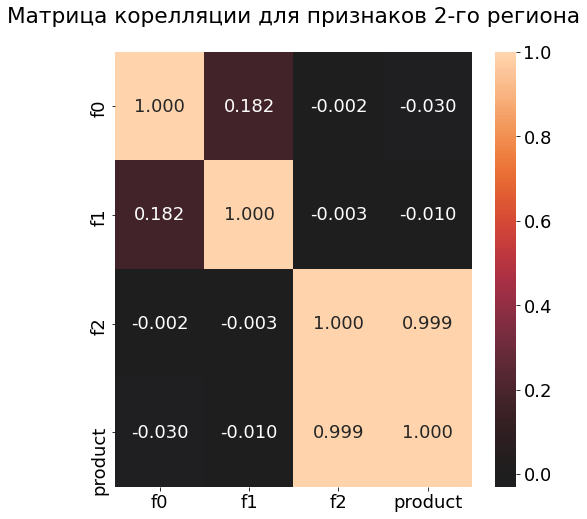

In [15]:
plt.figure(figsize=(8, 8))
sns.heatmap(region_2_data.corr(), annot=True, fmt='.3f', center=0)
plt.title('Матрица корелляции для признаков 2-го региона\n')
plt.show()

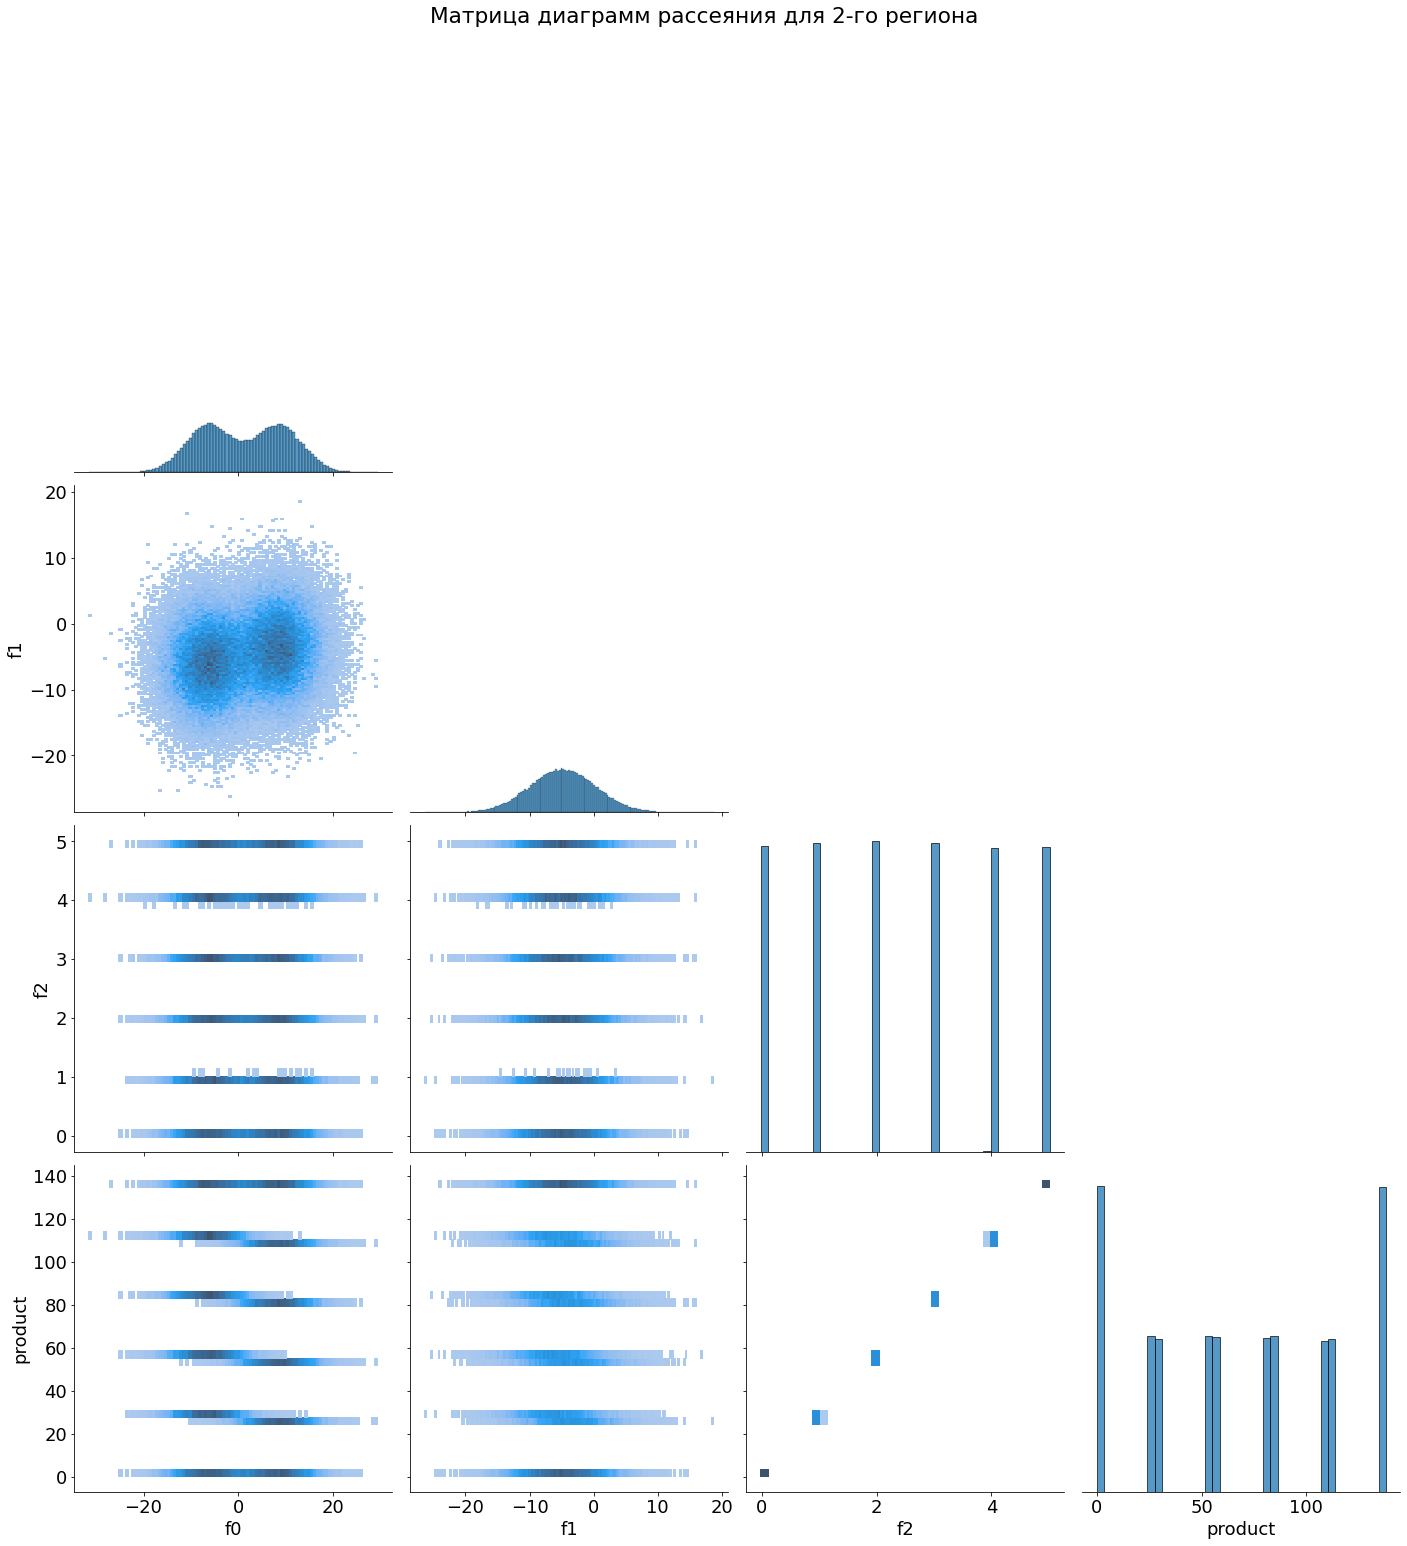

In [16]:
g = sns.pairplot(region_2_data, corner=True, kind='hist', height=5)
g.fig.suptitle('Матрица диаграмм рассеяния для 2-го региона', y=1.08)
plt.show()

### Третий регион

In [17]:
region_3_data.head(2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697


In [18]:
region_3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [19]:
region_3_data.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


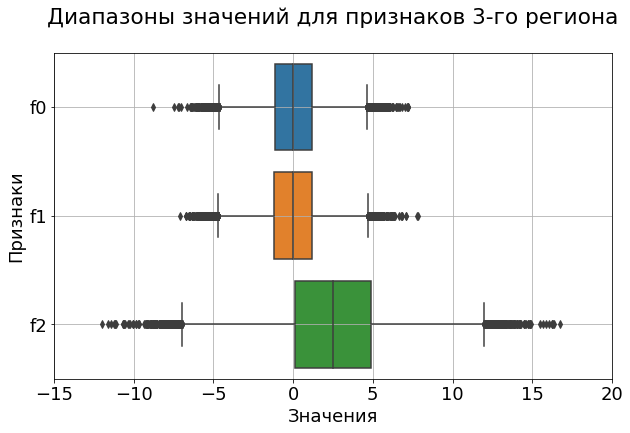

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=region_3_data.iloc[:, :-1], orient='h')
plt.grid()
plt.xlim(-15, 20)
plt.title('Диапазоны значений для признаков 3-го региона\n')
plt.xlabel('Значения')
plt.ylabel('Признаки')
plt.show()

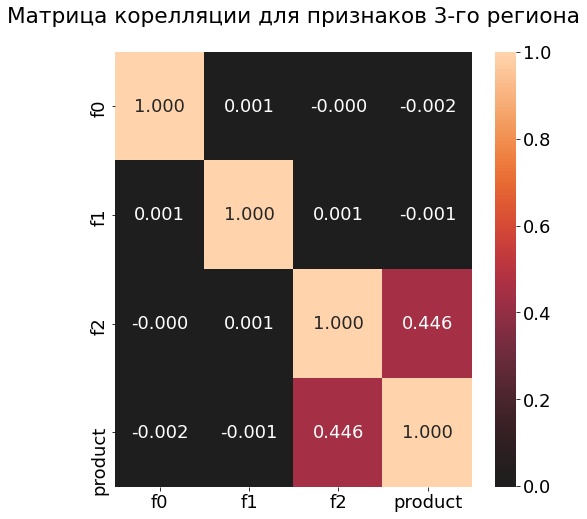

In [21]:
plt.figure(figsize=(8, 8))
sns.heatmap(region_3_data.corr(), annot=True, fmt='.3f', center=0)
plt.title('Матрица корелляции для признаков 3-го региона\n')
plt.show()

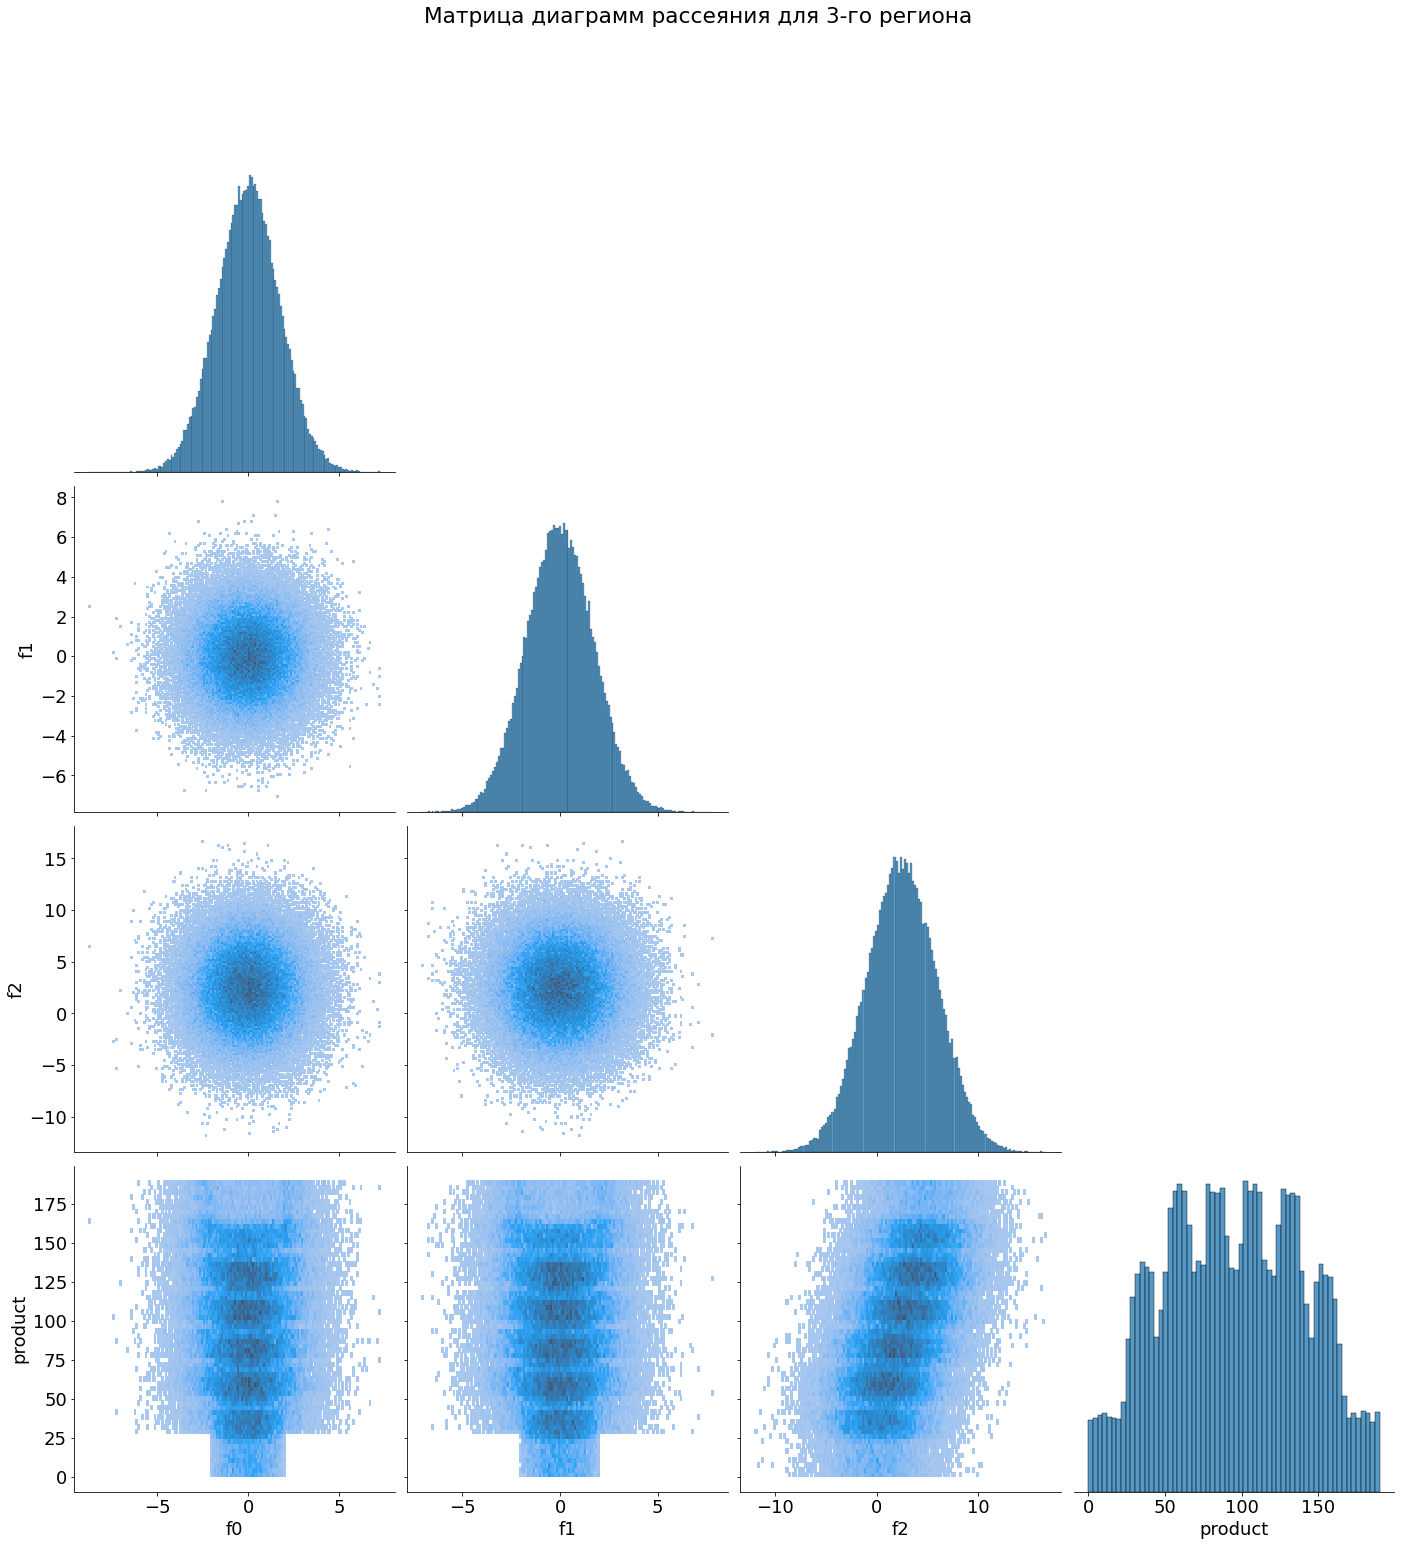

In [22]:
g = sns.pairplot(region_3_data, corner=True, kind='hist', height=5)
g.fig.suptitle('Матрица диаграмм рассеяния для 3-го региона', y=1.08)
plt.show()

В завершение взглянем также на распределение значений в колонке *product* по всем 3-м регионам:

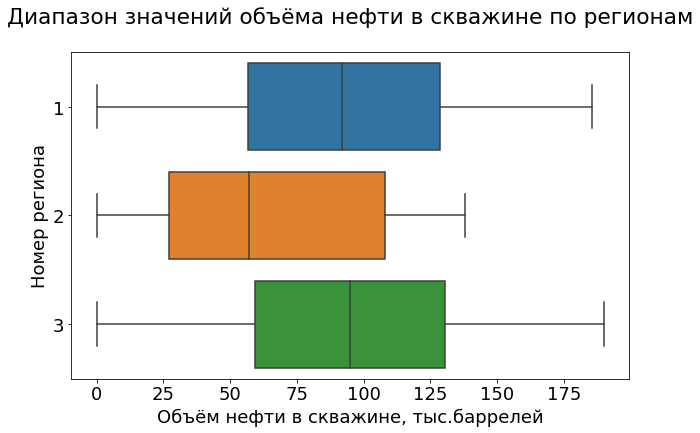

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=[
    region_1_data.iloc[:, -1],
    region_2_data.iloc[:, -1],
    region_3_data.iloc[:, -1]
], orient='h')
plt.yticks(range(3), (1, 2, 3))
plt.xlabel('Объём нефти в скважине, тыс.баррелей')
plt.ylabel('Номер региона')
plt.title('Диапазон значений объёма нефти в скважине по регионам\n')
plt.show()

### Предобработка данных

Наличие в данных полных дубликатов:

In [24]:
print(region_1_data.duplicated().sum())
print(region_2_data.duplicated().sum())
print(region_3_data.duplicated().sum())

0
0
0


Поскольку в этих данных колонка *id* представляет собой строковые значения, то в ней вполне могут быть дубликаты. Проверим это:

In [25]:
region_1_data[region_1_data.duplicated('id', keep=False)].sort_values('id')

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


In [26]:
region_2_data[region_2_data.duplicated('id', keep=False)].sort_values('id')

,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


In [27]:
region_3_data[region_3_data.duplicated('id', keep=False)].sort_values('id')

,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


В каждом из регионов есть по несколько дублирующихся *id*, причиной этого может быть то, что в рамках одного месторождения бурят сразу 2 различных скважины. Возможность ошибки ввода или считывания я исключаю, поскольку числовые значения в колонках с повторяющимися *id* различаются значительно.

Поскольку пропусков в данных, как и полных дубликатов не наблюдается, то осталось только удалить лишние для модели данные(в нашем случае индекс скважины *id*):

In [28]:
region_1_data.drop('id', axis=1, inplace=True)
region_2_data.drop('id', axis=1, inplace=True)
region_3_data.drop('id', axis=1, inplace=True)

### **Вывод**

1. Загружены и изучены наборы данных по 3 регионам, в каждом из которых по 5 столбцов и 100_000 строк;
2. В данных отсутствуют пропуски и дубликаты, однако некоторые *id* встречаются до 2 раз с разными показателями;
3. **Второй** регион значительно выделяется на фоне остальных: 
 - *product* имеет высокую степень корреляции с парметром *f2*, вероятность линейной зависимости высока; 
 - данные по остальным столбцам не разбросаны по области(кроме *f1-f0*), а сгруппированы по линиям вдоль осей;
4. В первом и третьем регионах данные распределены вокруг своего центра(можно наблюдать на pairplot).

## Обучение и проверка модели

Перед началом обучения сформинуем необходимые переменные и контейниры для сбора данных после обучения модели:

In [29]:
seed = 12345 # число, определяющее последовательность случайных чисел, используется при разбиении выборок

В словарь **regions** будем складывать *features* и *target* по каждому региону, а ключами будут служить соответствующие этим наборам номера регионов. Словарь **metrics** имеет аналогичные ключи, но внутри будет содеражаться словарь, который по ходу моделирования будет заполнен метриками соответствующей номеру региона модели.

In [30]:
# regions[номер_региона][параметр: 0 для features, 1 для target]
regions = {
    k: (x.drop('product', axis=1), x['product']) for k, x \
    in zip(range(1, 4), [region_1_data, region_2_data, region_3_data])
}
metrics = {1: {}, 2: {}, 3: {}}

Для каждого этапа характерен следующий порядок действий:

1. Рабиваем выборки на обучающую и валидационную в размере 75/25;
2. Тренируем и обучаем модель, записывае её предсказания;
3. Метрики модели записываем в соответствующие номеру региона словари;
4. Печатаем показания RMSE модели и средний по предсказаниям объём запасов в скважине.

In [31]:
def lr_metrics(reg_number):
    X_train, X_valid, y_train, y_valid = train_test_split(
        regions[reg_number][0],
        regions[reg_number][1],
        test_size=.25, random_state=seed)
    model = LinearRegression().fit(X_train, y_train)
    predictions = model.predict(X_valid)

    # коэффициент детерминации
    metrics[reg_number]['r2'] = r2_score(y_valid, predictions)
    # cредняя абсолютная ошибка
    metrics[reg_number]['mae'] = mean_absolute_error(y_valid, predictions)
    # cредняя квадратичная ошибка
    metrics[reg_number]['mse'] = mean_squared_error(y_valid, predictions)
    # корень из средней квадратичной ошибки
    metrics[reg_number]['rmse'] = metrics[reg_number]['mse'] ** .5
    print(f'Среднее значение по предсказаниям для {reg_number} региона: {predictions.mean(): .4f}')
    print('RMSE модели:', metrics[reg_number]['rmse'])
    return y_valid, predictions

### Первый регион

In [32]:
y1_true, y1_predict = lr_metrics(1)

Среднее значение по предсказаниям для 1 региона:  92.5926
RMSE модели: 37.5794217150813


### Второй регион

In [33]:
y2_true, y2_predict = lr_metrics(2)

Среднее значение по предсказаниям для 2 региона:  68.7285
RMSE модели: 0.893099286775617


### Третий регион

In [34]:
y3_true, y3_predict = lr_metrics(3)

Среднее значение по предсказаниям для 3 региона:  94.9650
RMSE модели: 40.02970873393434


Итоговый набор метрик сведём в одну таблицу и отсортируем по убыванию метрики *r2*, поскольку для линейной регрессии она имеет существенное влияние в оценки качества модели.

In [35]:
pd.DataFrame(metrics).T.sort_values('r2', ascending=False)

,r2,mae,mse,rmse
2,0.999623,0.718766,0.797626,0.893099
1,0.279943,30.919601,1412.212936,37.579422
3,0.205248,32.792652,1602.377581,40.029709


### **Вывод**

1. Модель для 1 региона несколько превосходит последнее место, но далеко не ушла от неё, *r2* всё ещё низок, а *mae* и *rmse* лишь на 2 пункта лучше, чем у худшей модели;
2. Лучше всего линейная регрессия описывает данные по 2 региону, что было заметно ещё на этапе EDA. В результате она качественно описывает данные(*r2* блика к 1) и имеет невысокую погрешность;
3. Самая худшая модель для 3 региона и среди представленных, так как метрика *r2* самая маленькая, а остальные же максимально высоки.
4. Линейная регрессия идеально подходит для предсказания запасов во 2-ом регионе, а остальные регионы не могут так же точно полагаться на эту модель ввиду большого значения отклонений и низкого значения коэффициента детерминации.

## Подготовка к расчёту прибыли

Цена разработки одной скважины:

In [36]:
REFERENCE_FIELD_REVENUE = BUDGET / FIELDS_TOTAL
REFERENCE_FIELD_REVENUE

50000000.0

Минимальный объём сырья, необходимый для окупаемости вложений:

In [37]:
REFERENCE_VOLUME = REFERENCE_FIELD_REVENUE / BARREL_1000
REFERENCE_VOLUME

111.11111111111111

Сравним с этим значением реальные и предсказанные моделью объёмы сырья:

In [38]:
oil_volumes = pd.DataFrame({
    'real': (y1_true.mean(),
             y2_true.mean(),
             y3_true.mean()),
    'predicted': (y1_predict.mean(),
                  y2_predict.mean(),
                  y3_predict.mean()),
}, index=range(1, 4))
oil_volumes['deviation'] = oil_volumes['real'] - REFERENCE_VOLUME

In [39]:
oil_volumes

,real,predicted,deviation
1,92.078597,92.592568,-19.032514
2,68.723136,68.728547,-42.387975
3,94.884233,94.965046,-16.226878


Выведем долю скважин, в которых нефти больше установленного порога:

In [40]:
y1_true.loc[y1_true >= REFERENCE_VOLUME].shape[0] / y1_true.size

0.36244

In [41]:
y2_true.loc[y2_true >= REFERENCE_VOLUME].shape[0] / y2_true.size

0.16744

In [42]:
y3_true.loc[y3_true >= REFERENCE_VOLUME].shape[0] / y3_true.size

0.38164

Необходимое значение объёма сырья для окупаемости во всех случаях оказалось больше среднего реального/предсказанного. По скважинам же выше требуемого складывается следующая картина: во втором регионе таких скважин лишь 17 %, а в первом и третьем - 37-38 %. Однако целиком на это среднее опираться не следует, ведь одинаковое среднее можно получить как на стабильных данных, где значения будут несильно отличаться от среднего, так и с данными в которых отклонение от среднего будет велико.

Поскольку для разработки выбирается 200 лучших из 500 случайных скважин со всего региона, то однозначно можно считать, что объём большей части из них будет ниже требуемого среднего. В таком случае есть основания полагать, что больше прибыли даст тот регион, где расположено много однотипных по объёму скважин, а не тот в котором есть много 'хороших' скважин. В таком регионе при случайном выборе возможен вариант, когда на 1 скважину выше среднего требуемого будет приходиться несколько 'плохих' скважин. Чтобы избежать такого расклада и проверить данное предположение, проведём процедуру бутстрапирования, т.е для каждого региона отберём 1000 раз по 500 случайных скважен и по 200 лучшим оценим прибыль.

Для корректной генерации случайных последовательностей зададим RandomState:

In [43]:
state = RandomState(12345)

Прибыль и риски будем рассчитывать с помощью функции risk_calc. На вход она принимает правильные ответы и предсказания, и возвращает массив, состоящий из среднего значения, верхнюю и нижнюю границу диапазона(95% доверительный интервал) и долю риска, т.е убыточных вариантов среди всех рассмотренных. С помощью процедуры бутстрап 1000 раз выбирается случайная выборка из 500 скважин и остаются только топ-200 скважин по *предсказанным* запасам сырья. В результате суммируются *реальные* значения объёма в скажинах, умножаются на цену тысячи баррелей и для расчёта прибыли вычитается бюджет на разработку всех скважин, т.е чистый заработок.

In [44]:
def risk_calc(real, pred, top=200):
    product = pd.DataFrame({'real': real, 'pred': pred})
    values = []
    for _ in range(1000):
        product_subsample = product.sample(n=500, random_state=state)
        top_product = product_subsample.sort_values(by='pred', ascending=False).head(top)
        values.append(BARREL_1000 * top_product['real'].sum() - BUDGET)
    return np.array([
        np.quantile(values, .025),
        np.mean(values),
        np.quantile(values, .975),
        len([*filter(lambda x: x < 0, values)]) / len(values)])

### **Вывод**

1. Для окупаемости скважины её запас сырья должен быть не меньше 111 тысяч баррелей;
2. Средние значения по регионам не превышают указанного значения, поэтому случайный выбор скважины может привести к убыткам;
3. В первом и третьем регионах доля подходящих скважин - 37 % и 38 % соответсвенно, меньше всего - во втором регионе - 17 %.
4. Для корректного выбора региона для разработки скважин проводится процедура bootstrap, т.е численный эксперимент для оценки прибыли и рисков убытков.

## Расчёт прибыли и рисков 

Соберём результаты по каждым регионам и сведём все в одну таблицу:

In [49]:
res_1 = risk_calc(y1_true, y1_predict)
res_2 = risk_calc(y2_true, y2_predict)
res_3 = risk_calc(y3_true, y3_predict)
results = np.array([res_1, res_2, res_3])

In [50]:
# Значения выручки переведём в млрд рублей
res_df = pd.DataFrame(
    {'lower': results[:, 0] / 1e9,
     'mean': results[:, 1] / 1e9,
     'upper': results[:, 2] / 1e9,
     'risk': results[:, 3]}, index=range(1, 4))

In [51]:
res_df

,lower,mean,upper,risk
1,-0.090290,0.398331,0.896264,0.055
2,0.068855,0.453658,0.842400,0.006
3,-0.150135,0.395967,0.917836,0.075


Отберём регионы, в которых риски не привышают критического значения:

In [48]:
res_df.query('risk < @CRIT_PROBABILITY')

,lower,mean,upper,risk
2,0.04673,0.454785,0.840213,0.013


### **Вывод**

Градация результатов по регионам следующая: 2, 1, 3:
1. Первый регион расположился ровно посередине, шанс риска 3.5%, и нижняя граница по выручке лежит ниже 0, среднее значение выручки 0.47 млрд. рублей;
2. Второй регион отличается максимальной средней выручкой и высокими границами в её разбросе, причём в убыток уйти нельзя, т.к нижняя граница по выручке составляет 0.13 млрд. рублей и риск составляет всего 0.2 %;
3. Самый худший регион, самая низкая средняя выручка - 0.34 млрд. рублей. и риск в 10 % уйти в убыток.

## Выводы

В данной работе было предложено решение задачи регрессии, связанной с оценкой запасов нефти в скважине. По её результатам можно сделать следующие выводы:

1. Данные по 3 регионам загружены и изучены, в каждом из которых по 3 признака и одному таргету, пропуски и дубликаты отсутствуют;
2. В первом и третьем регионах зависимости в данных не прослеживаются явным образом, второй регион выделяется тем, что у него ярко выраженная связь значения продукта с одним из параметров;
3. Данные по регионам разбиты на выборки и на их основе обучены модели линейной регрессии. Лучшие результаты показывает модель на данных второго региона;
4. Минимальный объём сырья для окупаемости бюджета составляет 111 тыс. баррелей и ни один из регионов в среднем не превосходит этого значения, поэтому выбирать скважины случайным образом неразумно;
5. С помощью бутстрапа была проведена оценка скважин в каждом из регионов, в результате чего собраны интервалы разброса выручки, её среднее значение и риски убытка.
6. По результатам моделирования регионом с низким риском убытков и положительной нижней границей по выручке оказался регион номер 2. Именно в нем следует бурить новую скважину.